In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('E:\\Shirin Gangal\\Python\\Python_learning\\Udemy ML\\dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [6]:
df.isnull().sum()


Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [7]:
df.isna().mean().sort_values(ascending=False)

Location            0.3265
Payment Method      0.2579
Item                0.0333
Price Per Unit      0.0179
Total Spent         0.0173
Transaction Date    0.0159
Quantity            0.0138
Transaction ID      0.0000
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [9]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce', downcast='float')
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       533
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [10]:
item_unique = df['Item'].unique()
print(item_unique)

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']


In [11]:
price_dict = {
    'Coffee': 2.0,
    'Tea': 1.5,
    'Sandwich': 4.0,
    'Salad': 5.0,
    'Cake': 3.0,
    'Cookie': 1.0,
    'Smoothie': 4.0,
    'Juice': 3.0
}
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Item'].map(price_dict))

In [12]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce', downcast='float')

In [13]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce', downcast='float')

In [14]:
df.isnull().sum()


Transaction ID         0
Item                 333
Quantity             479
Price Per Unit        54
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float32
 3   Price Per Unit    9946 non-null   float32
 4   Total Spent       9498 non-null   float32
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float32(3), object(5)
memory usage: 507.9+ KB


In [16]:
mask_total = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()

In [17]:
df.loc[mask_total, 'Total Spent'] = df.loc[mask_total, 'Quantity'] * df.loc[mask_total, 'Price Per Unit']
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit        54
Total Spent           23
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [18]:
# There is still Quantity which has large no of nans and Item
mask_quantity = df['Quantity'].isna() & df['Total Spent'].notna() & df['Price Per Unit'].notna()
df.loc[mask_quantity, 'Quantity'] = df.loc[mask_quantity, 'Total Spent'] / df.loc[mask_quantity, 'Price Per Unit']

In [19]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity              23
Price Per Unit        54
Total Spent           23
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [20]:
# Now this looks much better! We still have Items column, location and Payment method and Transaction date.
price_to_name_dict = {2.0: 'Coffee', 1.5: 'Tea', 5.0: 'Salad', 1.0: 'Cookie'}
df['Item']= df['Item'].fillna(df['Price Per Unit'].map(price_to_name_dict))

In [21]:
df.isnull().sum()

Transaction ID         0
Item                 185
Quantity              23
Price Per Unit        54
Total Spent           23
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [22]:
df['Item'].value_counts()

Item
Coffee      1204
Salad       1186
Juice       1171
Cake        1139
Sandwich    1131
Cookie      1130
Tea         1122
Smoothie    1096
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [33]:
mask = df['Item'].isin(['UNKNOWN', 'ERROR']) & df['Price Per Unit'].notna() & df['Quantity'].notna()
matching_rows = df[mask]
matching_rows.value_counts()

Transaction ID  Item     Quantity  Price Per Unit  Total Spent  Payment Method  Location  Transaction Date
TXN_1012349     UNKNOWN  4.0       3.0             12.0         Cash            In-store  2023-07-08          1
TXN_7406393     ERROR    5.0       1.5             7.5          Credit Card     Takeaway  2023-06-18          1
TXN_7078232     ERROR    5.0       3.0             15.0         Digital Wallet  Takeaway  2023-11-21          1
TXN_7106595     ERROR    2.0       1.5             3.0          Credit Card     Takeaway  2023-06-19          1
TXN_7249235     ERROR    3.0       4.0             12.0         Cash            ERROR     2023-05-27          1
                                                                                                             ..
TXN_4076631     ERROR    4.0       3.0             12.0         Cash            In-store  2023-07-21          1
TXN_4084177     UNKNOWN  3.0       1.0             3.0          Credit Card     In-store  2023-08-13         

In [50]:
price_item = {
    'Coffee': 2.0,
    'Tea': 1.5,
    'Sandwich': 4.0,
    'Salad': 5.0,
    'Cookie': 1.0,
    }
price_to_item = {v: k for k, v in price_item.items()}

# Update 'Item' if it's unknown or Error and Price is known
def infer_item(row):
    if row['Item'] in ['UNKNOWN', 'ERROR'] and pd.notna(row['Price Per Unit']):
        return price_to_item.get(row['Price Per Unit'], row['Item'])
    return row['Item']

df['Item'] = df.apply(infer_item, axis=1)



In [52]:
df['Item'].value_counts()

Item
Cookie      1301
Coffee      1286
Juice       1257
Salad       1255
Tea         1235
Smoothie    1180
Cake        1139
Sandwich    1131
UNKNOWN       18
ERROR         13
Name: count, dtype: int64

In [37]:
df['Payment Method'] = df['Payment Method'].replace(['UNKNOWN', 'ERROR'], np.nan)

In [38]:
df['Location'] = df['Location'].replace(['UNKNOWN', 'ERROR'], np.nan)

In [42]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
#df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [44]:
df.isnull().sum()

Transaction ID         0
Item                 185
Quantity              23
Price Per Unit        54
Total Spent           23
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

<Axes: ylabel='count'>

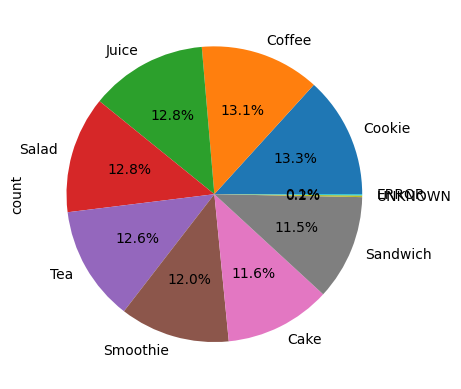

In [46]:
df['Item'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

<Axes: xlabel='Item'>

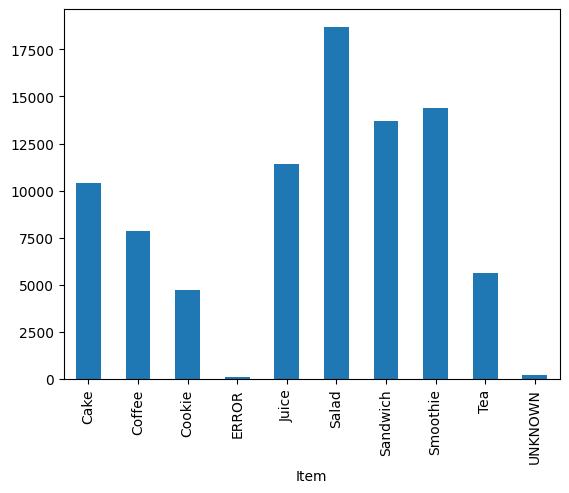

In [55]:
df.groupby('Item')['Total Spent'].sum().plot(kind = 'bar')

In [87]:
df['month'] = df['Transaction Date'].dt.strftime('%B')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,September
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,May
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,July
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,April
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,June


<Axes: xlabel='month'>

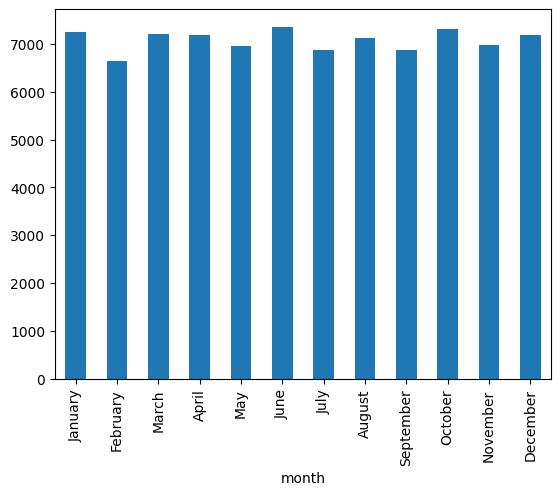

In [89]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
df.groupby('month')['Total Spent'].sum().reindex(month_order).plot(kind = 'bar')

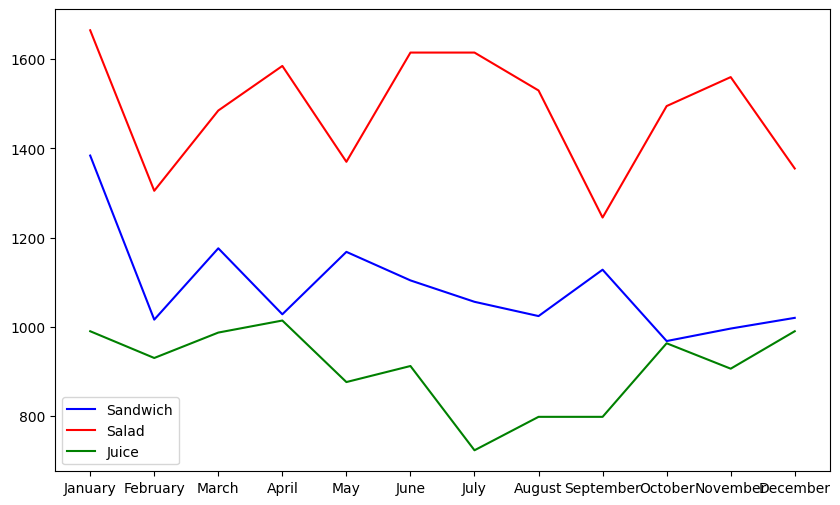

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
sandwich_sale = df[df['Item']== 'Sandwich'].groupby('month',observed='True')['Total Spent'].sum().reindex(month_order)
salad_sale= df[df['Item']== 'Salad'].groupby('month',observed='True')['Total Spent'].sum().reindex(month_order)
Juice_sale = df[df['Item']== 'Juice'].groupby('month',observed='True')['Total Spent'].sum().reindex(month_order)
line1, = ax.plot(month_order, sandwich_sale, color='b')
line2, = ax.plot(month_order, salad_sale, color='r')
line3, = ax.plot(month_order, Juice_sale, color='g')

ax.legend([line1, line2, line3], ['Sandwich', 'Salad', 'Juice'])
plt.show()

In [ ]:
#checked the data type of the columns and brought them to the required type
# filled in gaps in the data and removed NAN
# created 'month' columns for further analysis
# Examined the number of sales by product category during the year
# Analyzed total revenue by product category
# Researched salad, sandwich and Juice sales over the course of the year